In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.listdir('../data')

['creditcard.csv', 'valid.csv', 'train.csv', 'test.csv']

In [3]:
train = pd.read_csv('../data/train.csv')
valid = pd.read_csv('../data/valid.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
train.shape

(142403, 31)

In [5]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
train['Class'].value_counts() / len(train)

0    0.998251
1    0.001749
Name: Class, dtype: float64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142403 entries, 0 to 142402
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142403 non-null  float64
 1   V1      142403 non-null  float64
 2   V2      142403 non-null  float64
 3   V3      142403 non-null  float64
 4   V4      142403 non-null  float64
 5   V5      142403 non-null  float64
 6   V6      142403 non-null  float64
 7   V7      142403 non-null  float64
 8   V8      142403 non-null  float64
 9   V9      142403 non-null  float64
 10  V10     142403 non-null  float64
 11  V11     142403 non-null  float64
 12  V12     142403 non-null  float64
 13  V13     142403 non-null  float64
 14  V14     142403 non-null  float64
 15  V15     142403 non-null  float64
 16  V16     142403 non-null  float64
 17  V17     142403 non-null  float64
 18  V18     142403 non-null  float64
 19  V19     142403 non-null  float64
 20  V20     142403 non-null  float64
 21  V21     14

<AxesSubplot:>

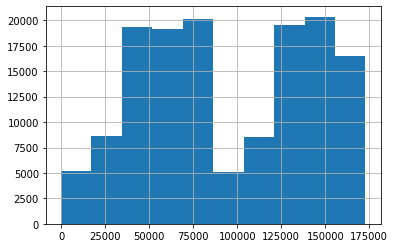

In [8]:
train['Time'].hist()

<AxesSubplot:>

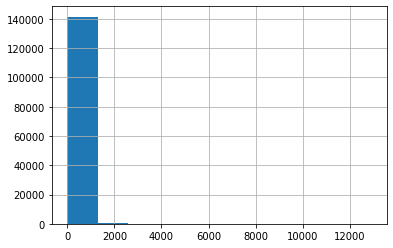

In [9]:
train['Amount'].hist()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

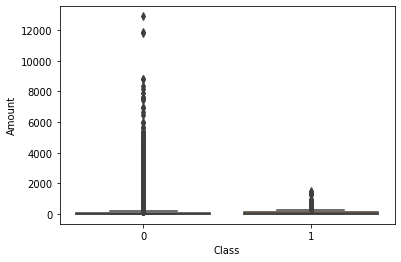

In [10]:
sns.boxplot(data=train, y='Amount', x='Class')

In [11]:
train.groupby('Class')['Amount'].mean()

Class
0     88.611763
1    130.845743
Name: Amount, dtype: float64

In [12]:
train.groupby('Class')['Amount'].median()

Class
0    21.99
1    17.06
Name: Amount, dtype: float64

# baseline modeling

In [13]:
X_train, y_train = train.drop('Class', axis=1), train['Class']
X_valid, y_valid = valid.drop('Class', axis=1), valid['Class']
X_test, y_test = test.drop('Class', axis=1), test['Class']

In [14]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [15]:
pred_train_prob = logit.predict_proba(X_train)
pred_valid_prob = logit.predict_proba(X_valid)
pred_test_prob = logit.predict_proba(X_test)

# Result

In [16]:
from utils import print_metrics, plot_roc_curve, plot_pr_curve, threshold_tuning_f1_score_plot

In [17]:
print('[train]')
print_metrics(y_train, pred_train_prob[:, 1])
print('[valid]')
print_metrics(y_valid, pred_valid_prob[:, 1])
print('[test]')
print_metrics(y_test, pred_test_prob[:, 1])

[train]
ROCAUC = 0.939
PRAUC = 0.612
[valid]
ROCAUC = 0.903
PRAUC = 0.585
[test]
ROCAUC = 0.915
PRAUC = 0.642


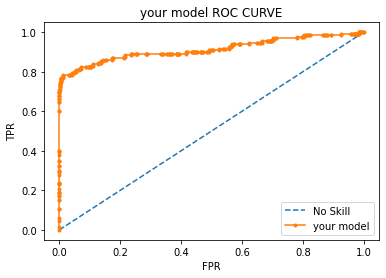

In [18]:
plot_roc_curve(y_test, pred_test_prob[:, 1])

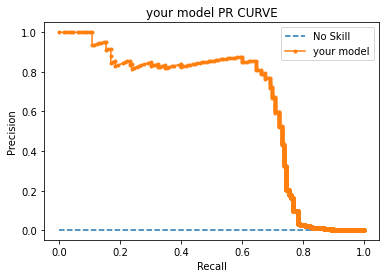

In [19]:
plot_pr_curve(y_test, pred_test_prob[:, 1])

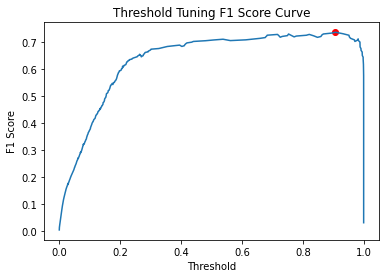

In [20]:
threshold_tuning_f1_score_plot(y_test, pred_test_prob[:, 1])